## Run the Self-Organizing Map
Training sample: KiDS <br>
Labeling sample: GAMA <br>
Validation sample: DESI <br>
___

First, load the data

In [59]:
from astropy.io import fits
from astropy.table import Table, hstack

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

In [58]:
#Load in KiDS data
with fits.open('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_SOM_catalog_11Jul24.fits') as cat:
    KiDS_cat = Table(cat[1].data)

#Load in GAMA data
with fits.open('/data2/lsajkov/mpdg/data_products/GAMA/GAMA_SOM_training_catalog_11Jul24.fits') as cat:
    GAMA_cat = Table(cat[1].data)

#Load in DESI data
with fits.open('/data2/lsajkov/mpdg/data_products/DESI/DESI_SOM_catalog_11Jul24.fits') as cat:
    DESI_cat = Table(cat[1].data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$i-Z$')

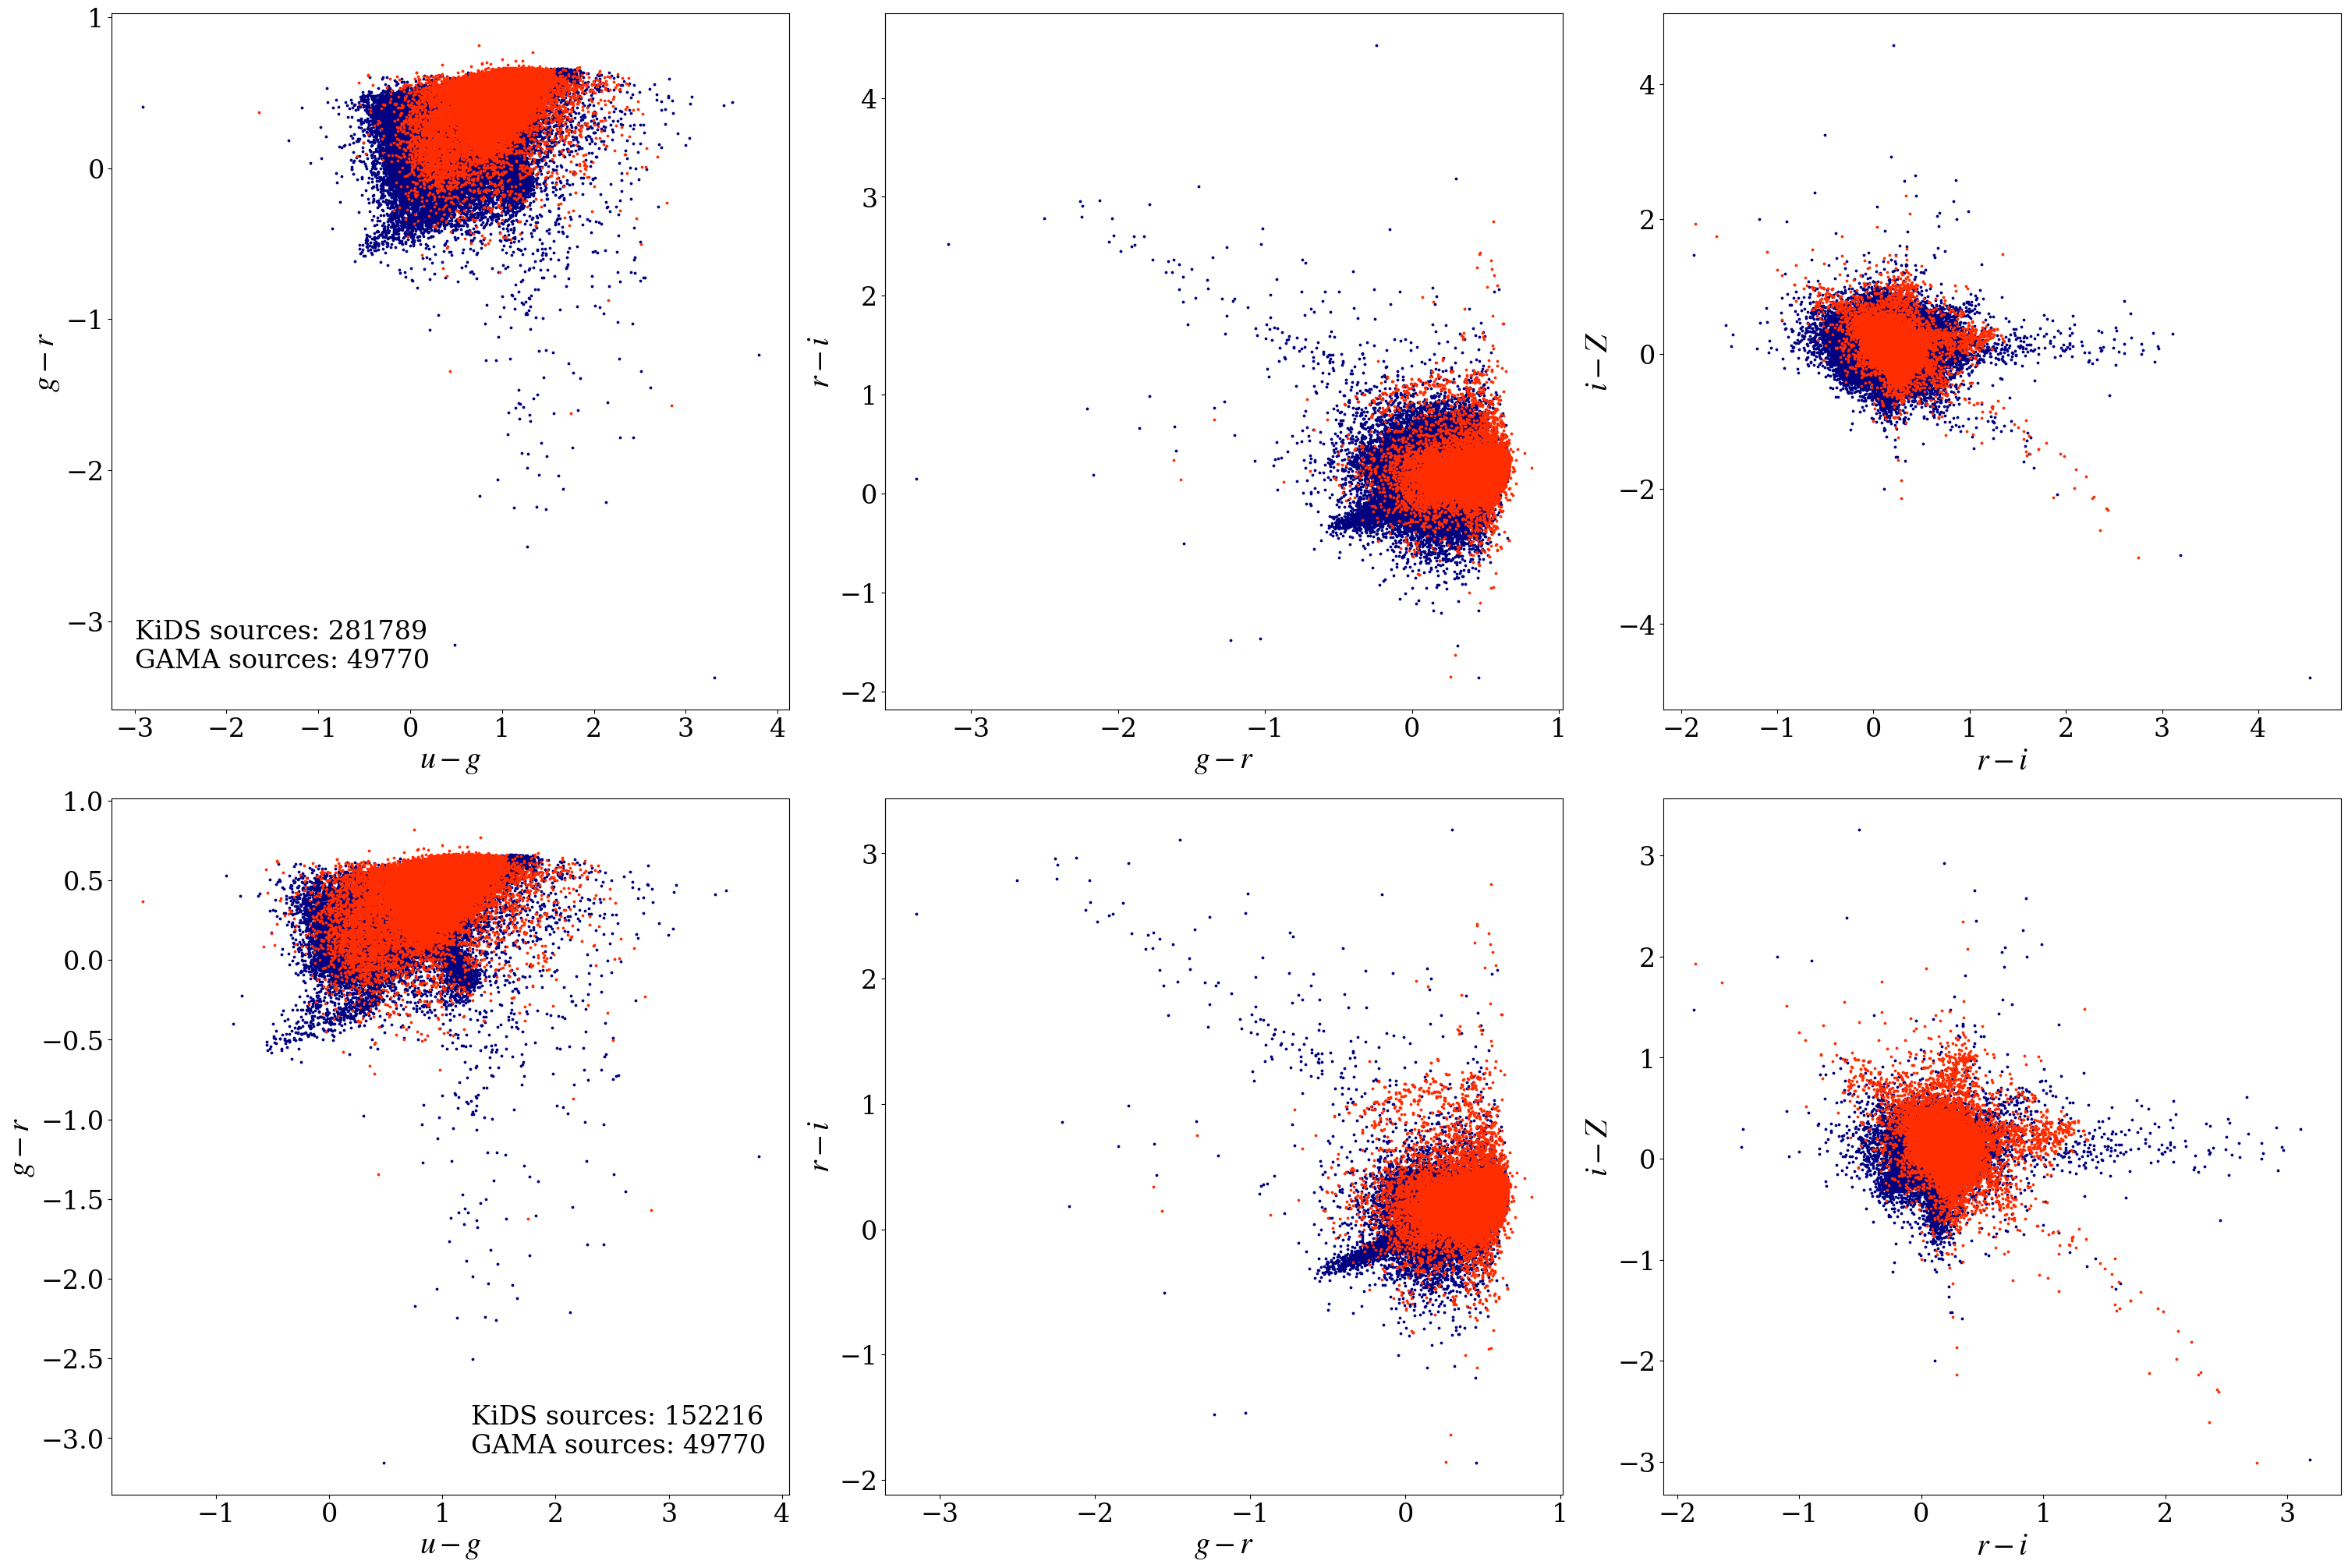

In [57]:
#Visualize input to make sure datasets overlap
fig = plt.figure(figsize = (30, 20), constrained_layout = True)

ax1 = fig.add_subplot(231)
ax1.scatter(KiDS_cat['ug_color'], KiDS_cat['gr_color'],
            color = mpl.cm.jet(0), s = 3)
ax1.scatter(GAMA_cat['ug_col'], GAMA_cat['gr_col'],
            color = mpl.cm.jet(220), s = 3)
ax1.set_xlabel('$u-g$'); ax1.set_ylabel('$g-r$')
ax1.legend(frameon = False,
           title = f'KiDS sources: {len(KiDS_cat)}\nGAMA sources: {len(GAMA_cat)}')

ax2 = fig.add_subplot(232)
ax2.scatter(KiDS_cat['gr_color'], KiDS_cat['ri_color'],
            color = mpl.cm.jet(0), s = 3)
ax2.scatter(GAMA_cat['gr_col'], GAMA_cat['ri_col'],
            color = mpl.cm.jet(220), s = 3)
ax2.set_xlabel('$g-r$'); ax2.set_ylabel('$r-i$')

ax3 = fig.add_subplot(233)
ax3.scatter(KiDS_cat['ri_color'], KiDS_cat['i_mag'] - KiDS_cat['Z_mag'],
            color = mpl.cm.jet(0), s = 3)
ax3.scatter(GAMA_cat['ri_col'], GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
            color = mpl.cm.jet(220), s = 3)
ax3.set_xlabel('$r-i$'); ax3.set_ylabel('$i-Z$')

KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5

ax4 = fig.add_subplot(234)
ax4.scatter(KiDS_cat[KiDS_mag_cut]['ug_color'], KiDS_cat[KiDS_mag_cut]['gr_color'],
            color = mpl.cm.jet(0), s = 3)
ax4.scatter(GAMA_cat['ug_col'], GAMA_cat['gr_col'],
            color = mpl.cm.jet(220), s = 3)
ax4.set_xlabel('$u-g$'); ax4.set_ylabel('$g-r$')
ax4.legend(frameon = False,
           title = f'KiDS sources: {len(KiDS_cat[KiDS_mag_cut])}\nGAMA sources: {len(GAMA_cat)}')

ax5 = fig.add_subplot(235)
ax5.scatter(KiDS_cat[KiDS_mag_cut]['gr_color'], KiDS_cat[KiDS_mag_cut]['ri_color'],
            color = mpl.cm.jet(0), s = 3)
ax5.scatter(GAMA_cat['gr_col'], GAMA_cat['ri_col'],
            color = mpl.cm.jet(220), s = 3)
ax5.set_xlabel('$g-r$'); ax5.set_ylabel('$r-i$')

ax6 = fig.add_subplot(236)
ax6.scatter(KiDS_cat[KiDS_mag_cut]['ri_color'], KiDS_cat[KiDS_mag_cut]['i_mag'] - KiDS_cat[KiDS_mag_cut]['Z_mag'],
            color = mpl.cm.jet(0), s = 3)
ax6.scatter(GAMA_cat['ri_col'], GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
            color = mpl.cm.jet(220), s = 3)
ax6.set_xlabel('$r-i$'); ax6.set_ylabel('$i-Z$')

# ax4 = fig.add_subplot(224)
# ax4.scatter(KiDS_cat['i_mag'] - KiDS_cat['Z_mag'],
#             KiDS_cat['Z_mag'] - KiDS_cat['Y_mag'])
# ax4.scatter(GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
#             GAMA_cat['z_mag'] - GAMA_cat['Y_mag'])

In [63]:
#Select the needed data
KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5

input_cat = KiDS_cat[KiDS_mag_cut]
input_data = Table([input_cat['ug_color'],
                     input_cat['gr_color'],
                     input_cat['r_mag'] - input_cat['i_mag']],
            names = ['ug_col',
                     'gr_col',
                     'ri_col'])
input_stds = Table([input_cat['ug_color_err'],
                    input_cat['gr_color_err'],
                    np.sqrt(input_cat['r_mag_err'] ** 2 + input_cat['i_mag_err'] ** 2)],
           names = ['ug_col_err',
                    'gr_col_err',
                    'ri_col_err'])

labels_cat = GAMA_cat
input_labels = Table([labels_cat['ug_col'],
                      labels_cat['gr_col'],
                      labels_cat['r_mag'] - labels_cat['i_mag'],
                      labels_cat['log_mstar'],
                      labels_cat['redshift']],
             names = ['ug_col',
                      'gr_col',
                      'ri_col',
                      'log_mstar',
                      'redshift'])

input_label_stds = Table([labels_cat['ug_col_err'],
                          labels_cat['gr_col_err'],
                          np.sqrt(labels_cat['r_mag'] ** 2 + labels_cat['i_mag'] ** 2)],
                 names = ['ug_col_err',
                          'gr_col_err',
                          'ri_col_err'])

# redshift_cut = input_catalog_complete['redshift'] <= 0.4
# input_labels     = input_catalog_complete[redshift_cut]['r_mag','gr_col', 'ug_col', 'ri_col', 'log_mstar', 'redshift']
# input_label_stds = input_catalog_complete[redshift_cut]['r_mag_err', 'gr_col_err', 'ug_col_err', 'ri_col_err']

# tuple_labels = input_labels.as_array()
# list_labels  = [list(values) for values in tuple_labels]
# input_labels = np.array(list_labels)

print(f'Len of input data: {len(input_data)}')

Len of input data: 152216


___

Initialize the SOM

In [66]:
from mpdg_som import SelfOrganizingMap

In [67]:
#Set parameters
name = 'mass_profile_dwarf_galaxies' #name of the SOM

mapsize   = [60, 60] #size of the map. pass as a list of dimensions OR as an integer (also pass number of dimensions)
dimension = None

initialization         = 'pca' #random or pca (principal component analysis)
termination            = 'either' #when to stop learning. maximum_steps = stop when maximum_steps have elapsed. error_thresh = stop when the error is below this threshold. either = stop when either condition is fulfilled
learning_rate_function = 'power_law' #which learning rate function to use. currently implemented: power_law
neighborhood_function  = 'gaussian' #which neighborhood function to use. currently implemented: gaussian
error_estimator        = 'quantization_error' #which error estimation function to use. currently implemented: max_misalignment

learning_rate = 0.64 #used to adjust the learning rate function
kernel_spread = 3.35 #used to adjust the neighborhood function
maximum_steps = 20 #used to adjust the learning rate and neighborhood functions
error_thresh  = 0.01 #used to stop the SOM if termination = 'error thresh'

In [68]:
#Declare the SOM
SOM = SelfOrganizingMap(
    name                   = name,
    mapsize                = mapsize,
    dimension              = dimension,
    initialization         = initialization,
    termination            = termination,
    learning_rate_function = learning_rate_function,
    neighborhood_function  = neighborhood_function,
    error_estimator        = error_estimator,
    learning_rate          = learning_rate,
    kernel_spread          = kernel_spread,
    maximum_steps          = maximum_steps,
    error_thresh           = error_thresh
)

In [13]:
data_cut = 30000 #use up to this much of the data (-1 for entire dataset)
randomized_idx = np.arange(0, len(input_data))
np.random.shuffle(randomized_idx)
randomized_data_idx  = randomized_idx[:data_cut]
randomized_label_idx = randomized_idx[data_cut:]

SOM.load_data(input_data[randomized_data_idx],
              variable_names = ['r_mag', 'g-r', 'u-g', 'r-i'])#, 'u-r'])
SOM.normalize_data()

SOM.load_standard_deviations(input_stds[randomized_data_idx])
SOM.normalize_standard_deviations()

SOM.data_statistics()

| Data statistics 
total entries: 30000

stat	r_mag	g-r	u-g	r-i	
min	0.000	0.000	0.000	0.000	
max	1.000	1.000	1.000	1.000	
mean	0.440	0.845	0.447	0.489	
median	0.457	0.855	0.453	0.490	
std	0.218	0.056	0.072	0.031	

In [14]:
#Initialize the SOM
SOM.build_SOM()


| SOM. Step 0. Initialization: pca
| Initial quantization error: 1.043


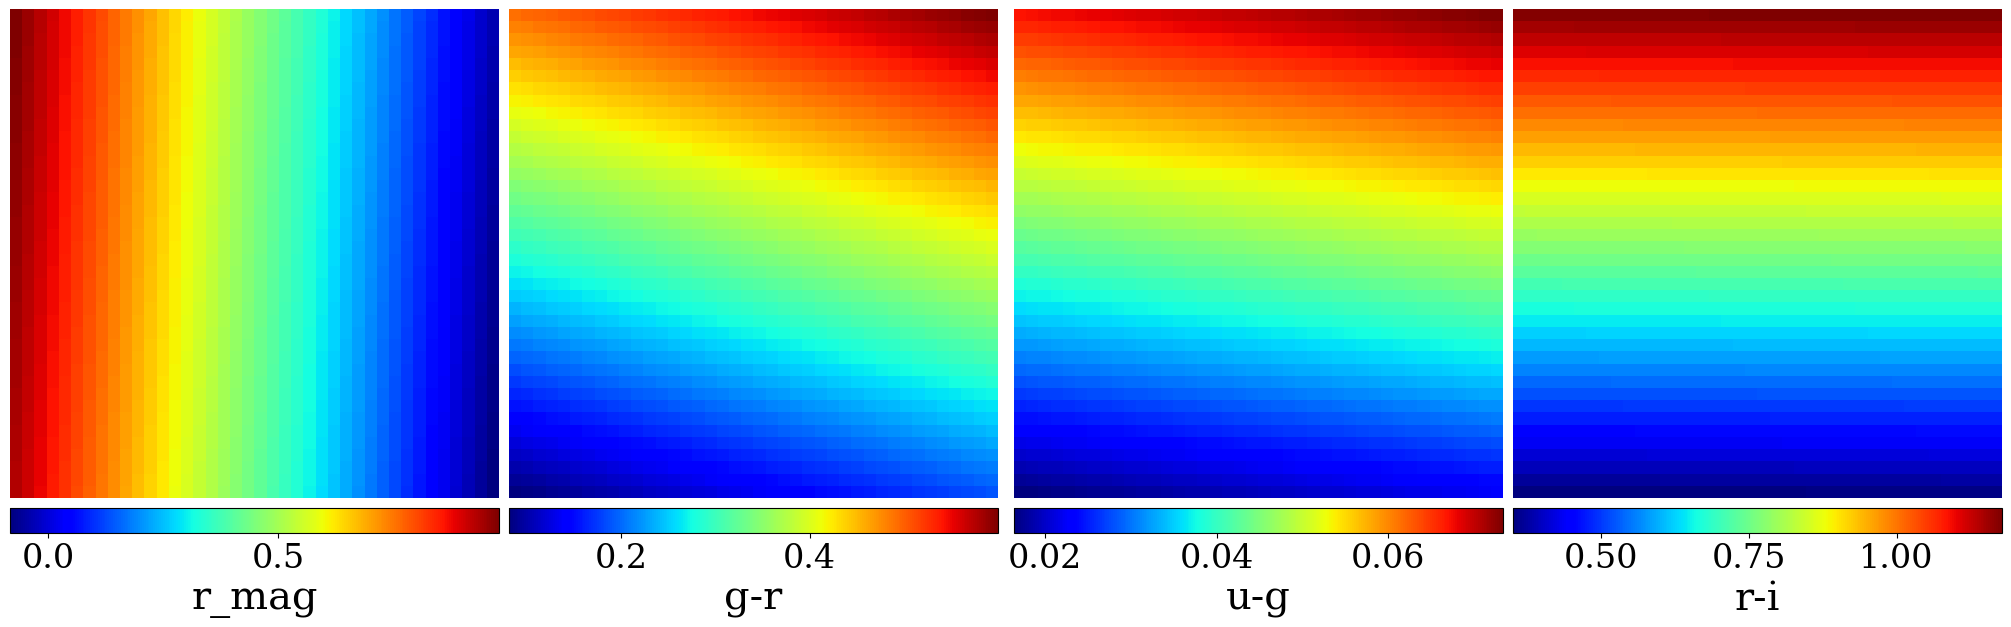

In [15]:
#Visualize SOM before training
SOM.show_map(cmap = 'jet')

#Look at initial quantization error
from mpdg_som_utils import SOM_ErrorEstimators

initial_quant_error = SOM_ErrorEstimators.quantization_error(SOM.weights_map,
                                                             SOM.data,
                                                             SOM.bmu_indices)
print(f'| Initial rms error: {initial_quant_error:.3f}')

In [16]:
#Train the som
SOM.train()

Step 1 complete. Error: 0.156                                   
Step 2 complete. Error: 0.130                                   
Step 3 complete. Error: 0.120                                   
Step 4 complete. Error: 0.132                                   
Step 5 complete. Error: 0.119                                   
Step 6 complete. Error: 0.107                                   
Step 7 complete. Error: 0.099                                   
Step 8 complete. Error: 0.101                                   
Step 9 complete. Error: 0.096                                   
Step 10 complete. Error: 0.095                                   
Step 11 complete. Error: 0.092                                   
Step 12 complete. Error: 0.092                                   
Step 13 complete. Error: 0.088                                   
Step 14 complete. Error: 0.087                                   
Step 15 complete. Error: 0.089                                   
Step 16 complete. E

0.073655814

In [ ]:
#Load trained map instead
SOM.weights_map = np.load('/data2/lsajkov/mpdg/saved_soms/weights.npy',
                          allow_pickle = True)
SOM.step = 10


| SOM. Step 20. Initialization: pca


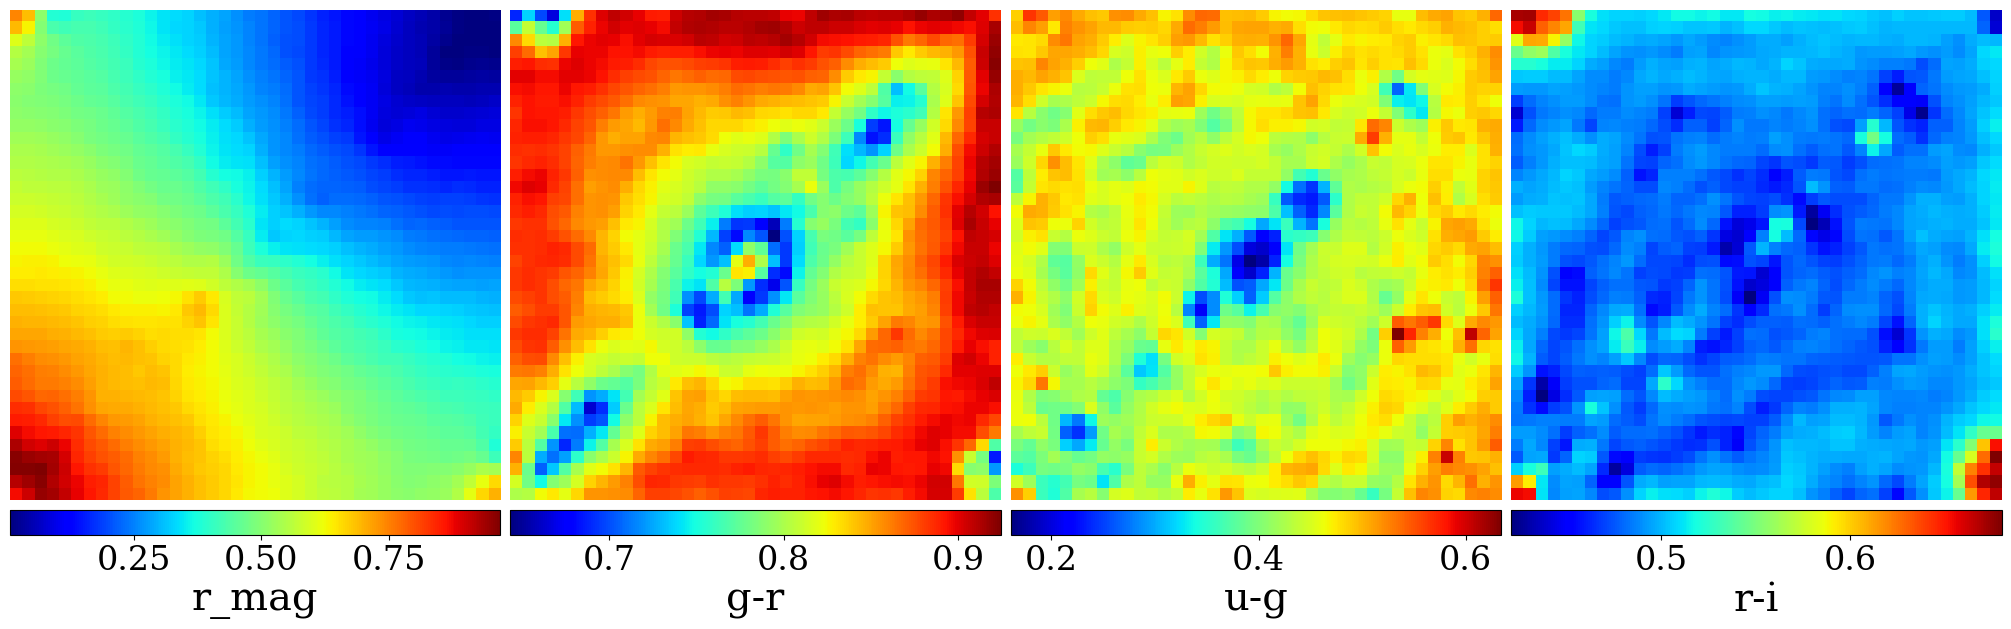

In [19]:
#Visualize the SOM after training
SOM.show_map(cmap = 'jet')

/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:403: RuntimeWarning: invalid value encountered in divide
  labeled_map[iteration_map.multi_index][i] /= A_c
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:389: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = np.sqrt((sigma_data ** 2) * (1 - 1/A_c) + (sigma_add ** 2)/N_cell)
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:389: RuntimeWarning: invalid value encountered in scalar divide
  sigma = np.sqrt((sigma_data ** 2) * (1 - 1/A_c) + (sigma_add ** 2)/N_cell)
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:391: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-((dist - np.mean(dist))**2)/ (2 * sigma ** 2))
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:391: RuntimeWarning: divide by zero encountered in divide
  return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-((dist - np.mean(dist))**2)/ (2 * sigma ** 2))
/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:391: RuntimeWarning: invalid value encou


| SOM. Step 20. Initialization: pca


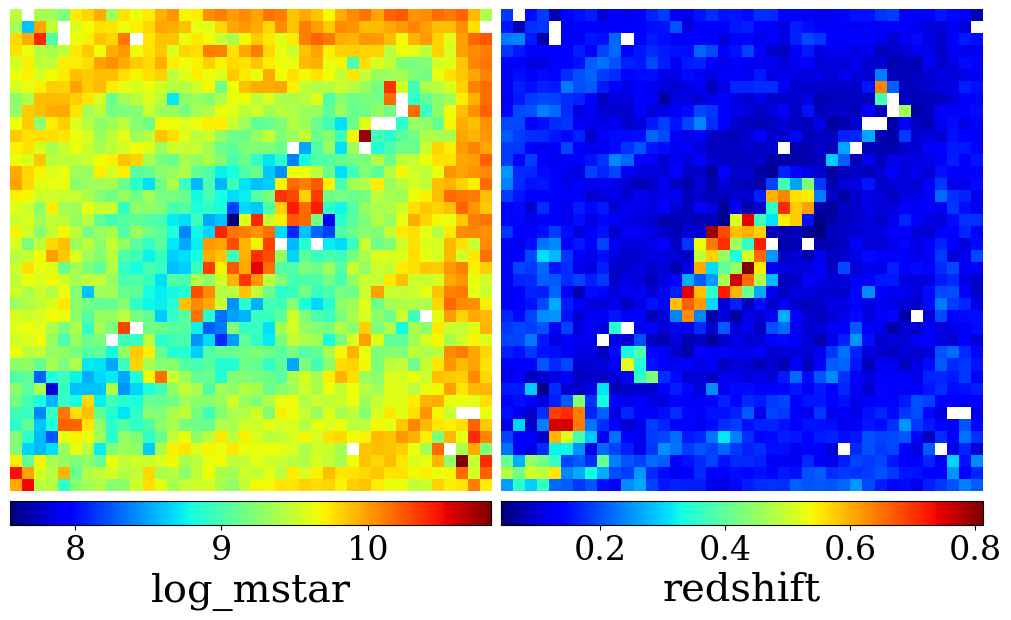

In [20]:
#Label the cells in the map with external parameters. Visualize the labeled map.
# SOM.load_labeling_data(input_labels[-int(data_cut):],

# for i, var in enumerate(SOM.normalization_params):
#     input_labels[:, i] -= SOM.normalization_params[var]['min']
#     input_labels[:, i] /= (SOM.normalization_params[var]['max'] - SOM.normalization_params[var]['min'])

#     print(input_label_stds.keys()[i], var)

#     input_label_stds[input_label_stds.keys()[i]] /= (SOM.normalization_params[var]['max'] - SOM.normalization_params[var]['min'])

SOM.load_labeling_data(input_labels[randomized_label_idx],
                       parameter_names = ['log_mstar', 'redshift'])
SOM.normalize_labeling_data()

SOM.load_labeling_standard_deviations(input_stds[randomized_label_idx])
SOM.normalize_labeling_standard_deviations()

SOM.label_map(pdr = 1000)

SOM.show_map(show_labeled = True,
             cmap = 'jet')

In [ ]:
from mpdg_som_utils import find_bmu_coords
import matplotlib.pyplot as plt

In [21]:
# SOM.predict(SOM.data)
SOM.predict(SOM.labeling_data[:, :4],
            SOM.label_variances[:, :4])

/data2/lsajkov/mpdg/strw_mpdg/mpdg_som.py:503: RuntimeWarning: invalid value encountered in sqrt
  prediction_sigmas[index] = np.sqrt(np.sum(self.distribution_xs ** 2 * self.labeled_map[*bmu_coords], axis = -1) -\


In [ ]:
SOM.save_outputs('/data2/lsajkov/mpdg/saved_soms',
                 save_weights = True, save_parameters = True)

In [ ]:
np.save('/data2/lsajkov/mpdg/saved_soms/10Jul24/prediction_results',
        SOM.prediction_results, allow_pickle = True)

In [ ]:
np.save('/data2/lsajkov/mpdg/saved_soms/10Jul24/labeling_data',
        SOM.labeling_data, allow_pickle = True)

___

Compare predictions to inputs

In [22]:
import matplotlib.pyplot as plt

<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_4164685/3476955548.py:23: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('GAMA log$_{10} (M_*/M_{\odot})$\nTrue')
/var/tmp/lsajkov/ipykernel_4164685/3476955548.py:24: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('Predicted\nSOM log$_{10} (M_*/M_{\odot})$')
/var/tmp/lsajkov/ipykernel_4164685/3476955548.py:28: SyntaxWarning: invalid escape sequence '\m'
  label = '$N_{\mathrm{galaxies}}$')


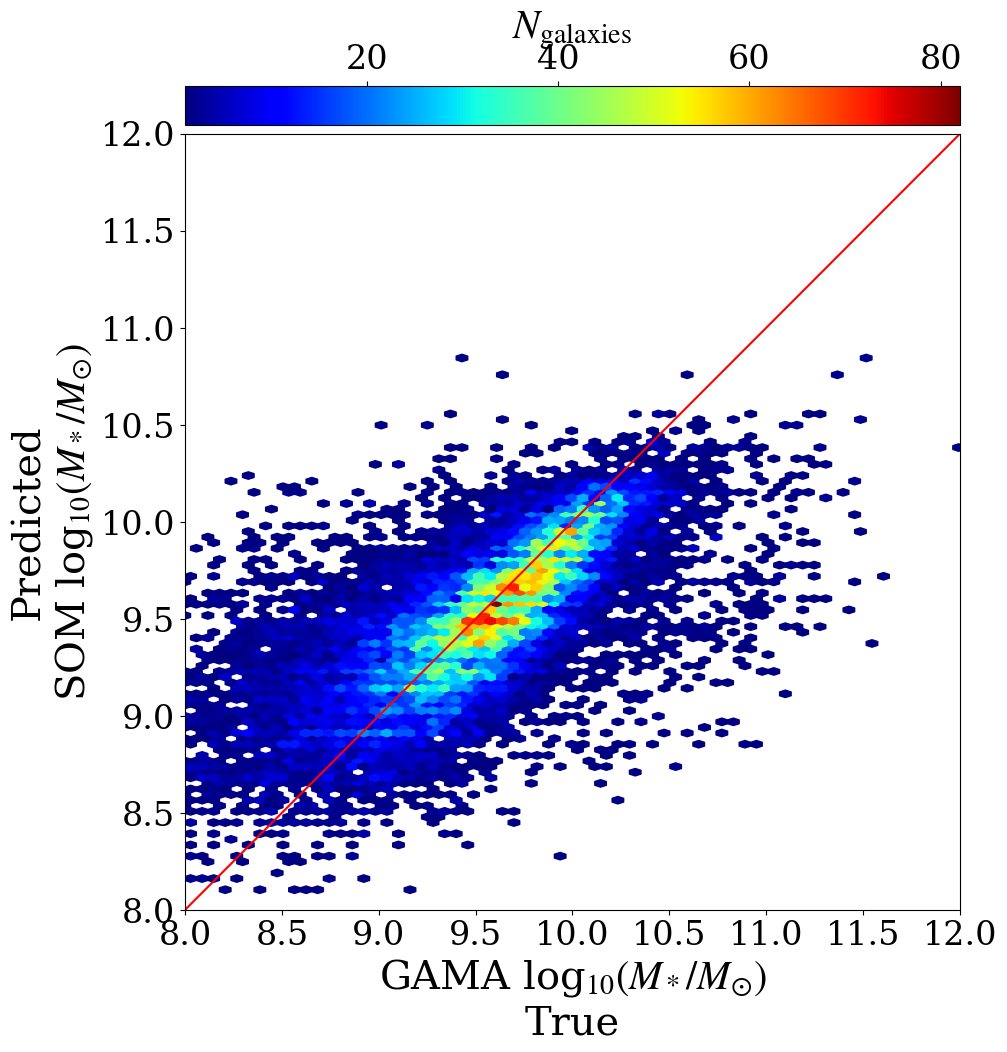

In [23]:
fig = plt.figure(figsize = (10, 12))

ax = fig.add_subplot()

hb = ax.hexbin(SOM.labeling_data[:, SOM.data_dim],
               SOM.prediction_results[:, 0],
               mincnt = 1, cmap = 'jet')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim][lo_stripe_idx],
#            SOM.prediction_results[:, 0][lo_stripe_idx],
#            color = 'green', s = 50, facecolor = 'none')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim][hi_stripe_idx],
#            SOM.prediction_results[:, 0][hi_stripe_idx],
#            color = 'red', s = 50, facecolor = 'none')

ax.axline([10, 10], slope = 1, color = 'red')

ax.set_xlim(8, 12)
ax.set_ylim(8, 12)
ax.set_xticks(np.arange(8, 12.5, 0.5))

ax.set_xlabel('GAMA log$_{10} (M_*/M_{\odot})$\nTrue')
ax.set_ylabel('Predicted\nSOM log$_{10} (M_*/M_{\odot})$')

fig.colorbar(ax = ax, mappable = hb,
             location = 'top', pad = 0.01,
             label = '$N_{\mathrm{galaxies}}$')

In [ ]:
np.sum((SOM.prediction_results[:, 1] > 0.33) & (SOM.labeling_data[:, -1] > 0.33) )/len(SOM.prediction_results) * 100

<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_4164685/4196949471.py:30: SyntaxWarning: invalid escape sequence '\m'
  label = '$N_{\mathrm{galaxies}}$')


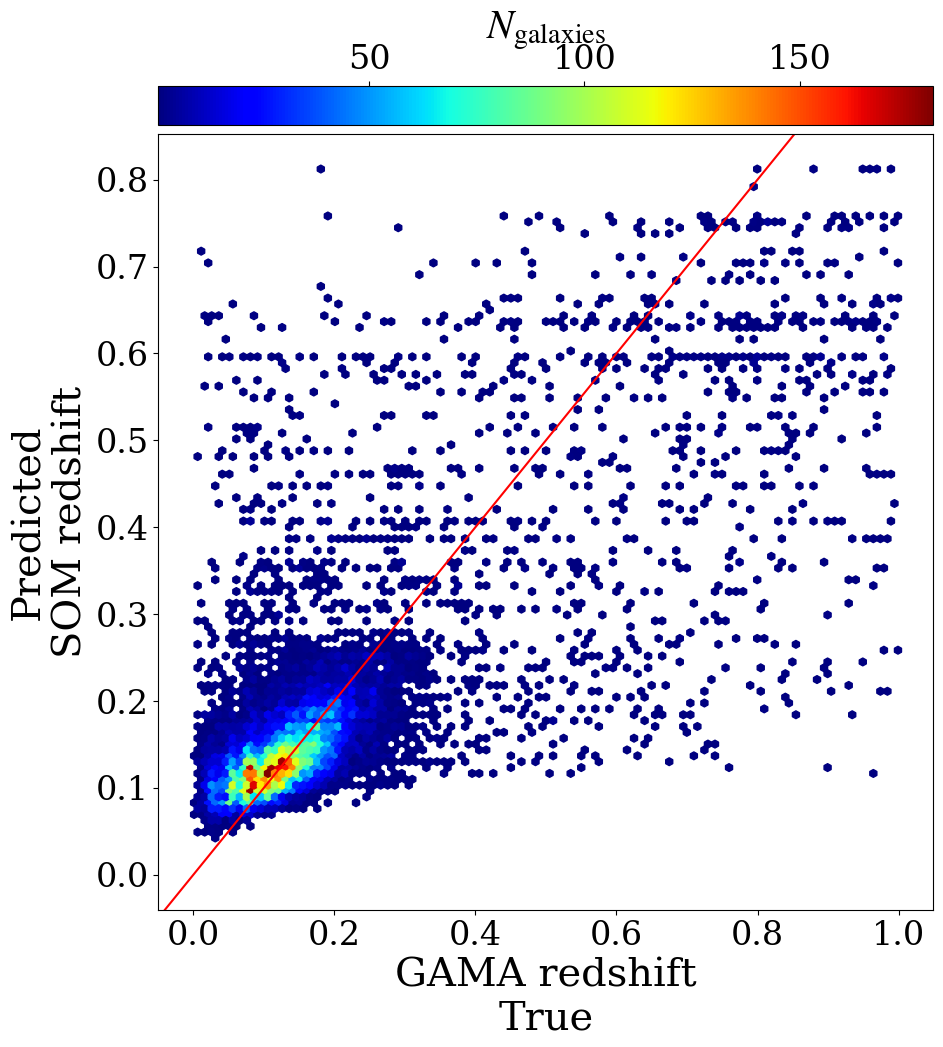

In [31]:
fig = plt.figure(figsize = (10, 12))

ax = fig.add_subplot()

hb = ax.hexbin(SOM.labeling_data[:, SOM.data_dim + 1],
               SOM.prediction_results[:, 1],
               mincnt = 1, cmap = 'jet')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim + 1][lo_stripe_idx],
#            SOM.prediction_results[:, 1][lo_stripe_idx],
#            color = 'green', s = 50, facecolor = 'none')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim + 1][hi_stripe_idx],
#            SOM.prediction_results[:, 1][hi_stripe_idx],
#            color = 'red', s = 50, facecolor = 'none')

ax.axline([0, 0], slope = 1, color = 'red')

# ax.set_xlim(0, 0.35)
# ax.set_ylim(0, 0.35)

ax.set_xlabel('GAMA redshift\nTrue')
ax.set_ylabel('Predicted\nSOM redshift')

# ax.axhline(0.33, color = 'black')
# ax.axvline(0.33, color = 'black')

fig.colorbar(ax = ax, mappable = hb,
             location = 'top', pad = 0.01,
             label = '$N_{\mathrm{galaxies}}$')

In [ ]:
SOM_zs = SOM.prediction_results[:, 1]

lo_stripe_idx = (SOM_zs < 0.4) & (SOM_zs > 0.35)
hi_stripe_idx = (SOM_zs < 0.6) & (SOM_zs > 0.5)

hi_stripe_r_mag = input_catalog_complete[-int(data_cut/2):][hi_stripe_idx]['r_mag']
lo_stripe_r_mag = input_catalog_complete[-int(data_cut/2):][lo_stripe_idx]['r_mag']

In [ ]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(lo_stripe_r_mag, bins = 'auto',
        histtype = 'step', color = 'green', linewidth = 5)

ax.set_xlabel('$r$-magnitude')

In [ ]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(hi_stripe_r_mag, bins = 'auto',
        histtype = 'step', color = 'red', linewidth = 5)

ax.set_xlabel('$r$-magnitude')